# logistic regression
Conny Lin | June 13, 2020 | updated June 16, 2020

## set up

### local computer


In [ ]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
# import standard libraries
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

getting host computer specific paths


### google colab


In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')# connect to google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# import functions
import pandas as pd
import numpy as np
import os, time, datetime
import matplotlib.pyplot as plt

class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')

    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()

    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    
    def session_end(self):
        self.end = time.time()
    
    def get_time(self):
        print(f'total time: {(self.end - self.start)/60:.3f} min')
        return self.session_times

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, \
                        hyperparameter_name='', titlename=''):
    
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.legend()
    plt.show()

In [3]:
# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(file_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(data['X_train'].shape)
# report time run
print(f'last ran on: {datetime.datetime.now()} PT')

loading data to data dictionary
loading completed
(1600000, 21)
last ran on: 2020-06-21 04:27:28.767466 PT


## rough tune with previous set up

In [ ]:
# get machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(localpaths['datapath']).mldata()

In [ ]:
# machine learning specific 
outputfolder = os.path.join(pCapstone,'ml_ols')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
# machine learning - rough try
C=0.01
random_state = 318
max_iter=1000
OLS = LogisticRegression(C=C, random_state=random_state, max_iter=max_iter)
OLS.fit(X_train, y_train)
y_predicted = OLS.predict(X_test)

print(f'train score: {OLS.score(X_train,y_train)}')
print(f'test score: {OLS.score(X_test,y_test)}')

/Users/connylin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train score: 0.8644
test score: 0.8638375


* C=0.01
* random_state = 318
* max_iter=1000

results are train/test both = 0.86

In [ ]:
X_columns = np.array(NC.names['X'])

In [ ]:
# take a look at predictive value of each parameter
# set dataframe
top_features = pd.DataFrame(X_columns, columns=['features'])
# get coefficient
X_logistic_coef = OLS.coef_
# put int OLS_coef
top_features['OLS_coef'] = X_logistic_coef[0]
# put in absolute
top_features['OLS_coef_abs'] = np.absolute(top_features['OLS_coef'].values)

In [ ]:
top_features.sort_values(ascending=False, inplace=True, by=['OLS_coef_abs'])
top_features

,features,OLS_coef,OLS_coef_abs
5,width,-10.813590,10.813590
9,aspect,-9.695887,9.695887
10,relaspect,3.588359,3.588359
7,length,2.830295,2.830295
6,relwidth,2.072623,2.072623
8,rellength,-1.924569,1.924569
2,area,-1.060606,1.060606
13,speed,0.994026,0.994026
3,midline,-0.943060,0.943060
4,morphwidth,0.691033,0.691033


* width, aspect are top predictors for etoh worms.
* interesting that curve doesn't do much

Should look at graphs differences between the two parameters

In [ ]:
# rough tune
# settingss
c_power_array = np.arange(-6,3, dtype=float)
c_value_list = [10**c for c in c_power_array]
max_iter_setting = 1000
cv = 5
import warnings
warnings.filterwarnings("ignore")
# solver_setting = 'lbfgs'

# train
train_score = []
test_score = []
cross_validation_scores = []
cross_validation_stdev = []
for cp in c_value_list:
    print(f'running C = {cp}')
    model = LogisticRegression(C=cp,
                               penalty='l2',
                               max_iter=max_iter_setting,
                               random_state=random_state)
    
    cv_result = cross_val_score(model, X_train, y_train, cv=cv)    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cv_result)
    cv_stdev = np.std(cv_result)
    # add to result
    cross_validation_scores.append(cv_score)
    cross_validation_stdev.append(cv_stdev)

running C = 1e-06
running C = 1e-05
running C = 0.0001
running C = 0.001
running C = 0.01
running C = 0.1
running C = 1.0
running C = 10.0
running C = 100.0


NameError: name 'plt' is not defined

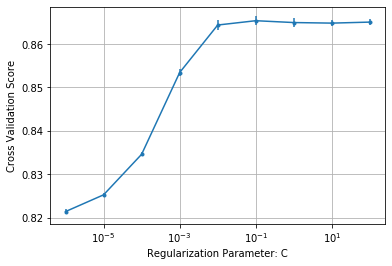

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]


In [ ]:
# plot
plt.figure()
plt.errorbar(c_value_list, 
             cross_validation_scores,
             yerr=cross_validation_stdev,
             label="Cross Validation Score",marker='.')
plt.xscale('Log')
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();
print(c_value_list)

In [ ]:
# June 13, 2020 - test gridsearch code
estimators = [('model', LogisticRegression())]
pipe = Pipeline(estimators)

params = [{
'model': [LogisticRegression()], 
'model__random_state':[318],
'model__C':[0.01, 0.05],
'model__max_iter':[1000],
'model__penalty':['l2'],
'model__verbose':[1],
}]

grid = GridSearchCV(pipe, param_grid=params, cv=3, verbose=True)
fittedgrid = grid.fit(X_train, y_train)


# LogisticRegression(C=1.0, class_weight=None, dual=False,
#fit_intercept=True, intercept_scaling=1,
#l1_ratio=None, max_iter=100,
#multi_class='auto', n_jobs=None,
#penalty='l2', random_state=None,
#solver='lbfgs', tol=0.0001, verbose=0,
#warm_start=False))],
#          verbose=False).

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/connylin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/connylin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge

array([0.86392625, 0.86529625])

In [ ]:
print(f'test score: {fittedgrid.score(X_test, y_test)}')
print('best estimator')
print(f'\t{fittedgrid.best_estimator_}')
print('best param')
print(fittedgrid.best_params_)
print('mean test score')
print(fittedgrid.cv_results_['mean_test_score'])

test score: 0.8652025
best estimator
	Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=0.05, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=318,
                                    solver='lbfgs', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)
best param
{'model': LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=318, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False), 'model__C': 0.05, 'model__max_iter': 1000, 'model__pen

After feature reduction...

## June 14, 2020, 15:45

reduce the default opening code and run comparison of feature reduction

In [ ]:
from brainstation_capstone.etl.datatransform import Nutcracker
NC_no_feature_reduction = Nutcracker(datapath)
NC_no_feature_reduction.mldata(feature_reduction='None')
from brainstation_capstone.ml import LogisticRegression
LogisticRegression.quicktest(NC_no_feature_reduction)

running logistic regression
train score: 0.86937125
test score: 0.869065


(0.86937125, 0.869065, {})

In [ ]:
from brainstation_capstone.etl.datatransform import Nutcracker
NC = Nutcracker(datapath)
NC.mldata(feature_reduction='standard')
from brainstation_capstone.ml import LogisticRegression
LogisticRegression.quicktest(NC)

running logistic regression
train score: 0.866989375
test score: 0.8665125


(0.866989375, 0.8665125, {})

Including all features are better off. 

## June 16, 2020
hyperparameter tuning. copied code from: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/


In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

Best: 0.867009 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.866970 (0.000942) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.866971 (0.000941) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866971 (0.000941) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.866970 (0.000942) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.866972 (0.000940) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866971 (0.000942) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.866970 (0.000943) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.866971 (0.000944) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866969 (0.000944) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.866968 (0.000949) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.866967 (0.000948) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866968 (0.000951) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.867007 (0.000933) wi

Best: 0.867009 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

**solver**{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
* ‘liblinear’ and ‘saga’ also handle L1 penalty
* ‘saga’ also supports ‘elasticnet’ penalty
* ‘liblinear’ does not support setting penalty='none'

Seem to max out on C=0.01. Try lower C. set random_state to 318. Also change cv=5.

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.01, 0.001, 0.0001, 0.00001]
random_state=[318]
cv=5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict(solver=solvers, penalty=penalty, C=c_values, random_state=random_state)

# define grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

Best: 0.867019 using {'C': 0.01, 'penalty': 'l2', 'random_state': 318, 'solver': 'liblinear'}
0.867018 (0.000422) with: {'C': 0.01, 'penalty': 'l2', 'random_state': 318, 'solver': 'newton-cg'}
0.867016 (0.000422) with: {'C': 0.01, 'penalty': 'l2', 'random_state': 318, 'solver': 'lbfgs'}
0.867019 (0.000418) with: {'C': 0.01, 'penalty': 'l2', 'random_state': 318, 'solver': 'liblinear'}
0.866756 (0.000504) with: {'C': 0.001, 'penalty': 'l2', 'random_state': 318, 'solver': 'newton-cg'}
0.866752 (0.000503) with: {'C': 0.001, 'penalty': 'l2', 'random_state': 318, 'solver': 'lbfgs'}
0.866744 (0.000507) with: {'C': 0.001, 'penalty': 'l2', 'random_state': 318, 'solver': 'liblinear'}
0.864464 (0.000366) with: {'C': 0.0001, 'penalty': 'l2', 'random_state': 318, 'solver': 'newton-cg'}
0.864466 (0.000367) with: {'C': 0.0001, 'penalty': 'l2', 'random_state': 318, 'solver': 'lbfgs'}
0.864401 (0.000370) with: {'C': 0.0001, 'penalty': 'l2', 'random_state': 318, 'solver': 'liblinear'}
0.854649 (0.000623

Maxed out at 86.7% accuracy. Best at {'C': 0.01, 'penalty': 'l2', 'random_state': 318, 'solver': 'liblinear'}

## model evaluation

previous tuning show that C=0.01 achieves pretty optimized score. Use this setting to evaluate the model.


### cross validation score

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=318, C=0.01)
scores = cross_val_score(model, data['X_train'], data['y_train'], cv = 5)
print(f'Cross validation scores: {scores}')


[0.86984063 0.86843437 0.87003438 0.86894688 0.8696375 ]


In [7]:
print(f"Average score:{np.mean(scores)}")

Average Score:0.8693787499999999


In [8]:
# fit the model and predict
model.fit(data['X_train'], data['y_train'])

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=318, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# score the model
train_score = model.score(data["X_train"], data['y_train'])
print(f'Score on train: {train_score}')
test_score = model.score(data['X_test'], data['y_test'])
print(f'Score on test: {test_score}')

Score on train: 0.86937125
Score on test: 0.8690725


confusion matrix for test


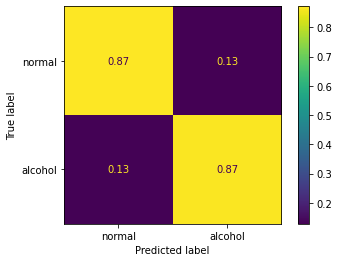

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(data['X_test'])
conf_matrix_test = confusion_matrix(data['y_test'], y_pred, normalize='true')
from sklearn.metrics import ConfusionMatrixDisplay
print('confusion matrix for test')
ConfusionMatrixDisplay(conf_matrix_test, display_labels=['normal', 'alcohol']).plot()

In [38]:
conf_matrix_test = pd.DataFrame(conf_matrix_test, columns=['Predicted normal', 'Predicted alcohol'])
conf_matrix_test.index =['True normal', 'True alcohol']
conf_matrix_test

,Predicted normal,Predicted alcohol
True normal,0.871596,0.128404
True alcohol,0.133454,0.866546


In [31]:
from sklearn.metrics import classification_report
report_initial = classification_report(data['y_test'], y_pred)
print(report_initial)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87    200119
         1.0       0.87      0.87      0.87    199881

    accuracy                           0.87    400000
   macro avg       0.87      0.87      0.87    400000
weighted avg       0.87      0.87      0.87    400000



In [56]:
# get real answer probability
false_proba = np.count_nonzero(data['y_test']) / data['y_test'].shape[0]
true_proba = 1.0 - false_proba
print(f'test set normal case probability: {false_proba:.3f}')
print(f'test set alcohol case probability: {true_proba:.3f}')

test set normal case probability: 0.500
test set alcohol case probability: 0.500


In [52]:
# probablistic predictions
y_proba = model.predict_proba(data['X_test'])[:,1]
y_proba

array([0.90390764, 0.49364601, 0.06424215, ..., 0.01920217, 0.05965128,
       0.21067841])

In [55]:
# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(data['y_test'], y_threshold)}")
print(f"Recall score: {recall_score(data['y_test'], y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(data['y_test'], y_threshold)}")
print(f"Recall score: {recall_score(data['y_test'], y_threshold)}")

Threshold of 0.5:
Precision score: 0.8708107510231169
Recall score: 0.8665455946288041

Threshold of 0.2:
Precision score: 0.7293526248734619
Recall score: 0.9480040624171382


See how threshold changes prediction

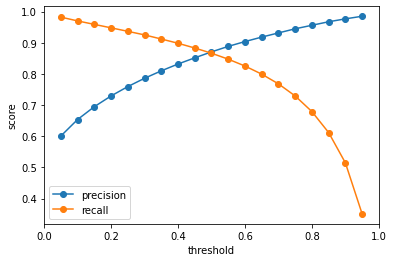

In [64]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)
precisions = list()
recalls = list()
neg_recalls = list()
for threshold in thresholds:
    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    # Calculate precision and recall
    precision = precision_score(data['y_test'], y_threshold)
    recall = recall_score(data['y_test'], y_threshold)
    neg_recall = recall_score(1-data['y_test'], 1-y_threshold)
    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    neg_recalls.append(neg_recall)
# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

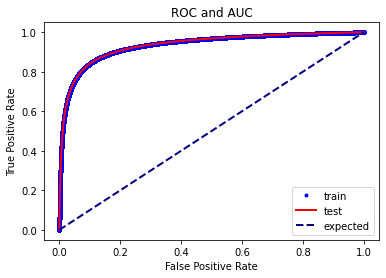

Test AUC score: 0.934435771738624
Train AUC score: 0.9346862623899876


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba_train = model.predict_proba(data['X_train'])[:,1]
fprs_train, tprs_train, thresholds_train = roc_curve(data['y_train'], y_proba_train)
roc_auc_train = roc_auc_score(data['y_train'], y_proba_train)

fprs_test, tprs_test, thresholds_test = roc_curve(data['y_test'], y_proba_test)
roc_auc_test = roc_auc_score(data['y_test'], y_proba_test)
y_proba_test = model.predict_proba(data['X_test'])[:,1]

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='blue', lw=2, label='train', linestyle=' ', marker='.')
plt.plot(fprs_test, tprs_test, lw=2, color='red', label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='expected')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")